<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Predict the Credit_Mix category for a customer based on their financial data, and provide actionable insights to improve credit health.</h2>

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Import Libraries</h2>

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Statistics and Scipy modules
import scipy.stats as stats
import statistics

# Preprocessing and model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix
)

# Machine learning models
from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier, SGDClassifier, 
    PassiveAggressiveClassifier
)
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, 
    AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, 
    VotingClassifier, StackingClassifier, HistGradientBoostingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

# Third-party gradient boosting frameworks
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Calibration tools
from sklearn.calibration import CalibratedClassifierCV

# Miscellaneous warnings handling
import warnings
warnings.filterwarnings('ignore')

In [63]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/Bank%20Data.csv'
df = pd.read_csv(url)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [64]:
#Drop columns
print("Size of Dataset before dropping columns : ",df.shape)
drop_columns = ['ID','Customer_ID','Name','SSN', 'Credit_History_Age']
df.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df.shape)

Size of Dataset before dropping columns :  (50000, 27)
Size of Dataset after dropping columns :  (50000, 22)


In [65]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance'],
      dtype='object')

In [66]:
df.shape

(50000, 22)

In [67]:
#Check Train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  object 
 1   Age                       50000 non-null  object 
 2   Occupation                50000 non-null  object 
 3   Annual_Income             50000 non-null  object 
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               50000 non-null  object 
 9   Type_of_Loan              44296 non-null  object 
 10  Delay_from_due_date       50000 non-null  int64  
 11  Num_of_Delayed_Payment    46502 non-null  object 
 12  Changed_Credit_Limit      50000 non-null  object 
 13  Num_Credit_Inquiries      48965 non-null  float64
 14  Credit

In [68]:
#Check statistical values for fields with numerical datatype
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,42502.0,4182.004291,3174.109304,303.645417,1625.188333,3086.305000,5934.189094,15204.633333
Num_Bank_Accounts,50000.0,16.838260,116.396848,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,50000.0,22.921480,129.314804,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,50000.0,68.772640,451.602363,1.000000,8.000000,13.000000,20.000000,5799.000000
Delay_from_due_date,50000.0,21.052640,14.860397,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,48965.0,30.080200,196.984121,0.000000,4.000000,7.000000,10.000000,2593.000000
Credit_Utilization_Ratio,50000.0,32.279581,5.106238,20.509652,28.061040,32.280390,36.468591,48.540663
Total_EMI_per_month,50000.0,1491.304305,8595.647887,0.000000,32.222388,74.733349,176.157491,82398.000000


In [69]:
# df.duplicated()

In [70]:
#Check statistical values for fields with other than numerical datatype
df.describe(exclude=np.number).T

,count,unique,top,freq
Month,50000,4,September,12500
Age,50000,976,39,1493
Occupation,50000,16,_______,3438
Annual_Income,50000,16121,72524.2,8
Num_of_Loan,50000,263,2,7173
Type_of_Loan,44296,6260,Not Specified,704
Num_of_Delayed_Payment,46502,443,19,2622
Changed_Credit_Limit,50000,3927,_,1059
Credit_Mix,50000,4,Standard,18379
Outstanding_Debt,50000,12685,1360.45,12


In [71]:
# df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

In [72]:
print(df.dtypes)

Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object


In [73]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

# Numerical & Categorical columns
print("Categorical Columns:", df.select_dtypes(include=["object", "category"]).columns.tolist())
print('-'*80)
print("Numerical Columns:", df.select_dtypes(include=["int64", "float64"]).columns.tolist())

Categorical Columns: ['Month', 'Occupation', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
--------------------------------------------------------------------------------
Numerical Columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Project Workflow</h2>

In order to do this project, must follow this structure....

## 1. Data Preprocessing
- Handle missing and invalid values in the dataset.
- Encode categorical variables appropriately.
- Scale and normalize numeric features for uniformity.
- Detect and address outliers to improve model stability.

In [74]:
df.isnull().sum()

Month                          0
Age                         2477
Occupation                     0
Annual_Income               3520
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt             491
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4446
Payment_Behaviour              0
Monthly_Balance              568
dtype: int64

In [75]:
# total number of rows 
total_rows = len(df)
missing_percentage = (df.isnull().sum() / total_rows) * 100

missing_summary = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage (%)': missing_percentage
})

missing_summary = missing_summary.sort_values(by='Percentage (%)', ascending=False)
print(missing_summary)

                          Missing Values  Percentage (%)
Monthly_Inhand_Salary               7498          14.996
Type_of_Loan                        5704          11.408
Amount_invested_monthly             4446           8.892
Annual_Income                       3520           7.040
Num_of_Delayed_Payment              3498           6.996
Age                                 2477           4.954
Num_Credit_Inquiries                1035           2.070
Monthly_Balance                      568           1.136
Outstanding_Debt                     491           0.982
Month                                  0           0.000
Num_Bank_Accounts                      0           0.000
Occupation                             0           0.000
Num_of_Loan                            0           0.000
Num_Credit_Card                        0           0.000
Changed_Credit_Limit                   0           0.000
Delay_from_due_date                    0           0.000
Interest_Rate                  

In [76]:
print(df['Credit_Mix'].unique())  
df['Credit_Mix'] = df.groupby('Occupation')['Credit_Mix'].transform(lambda x: x.fillna(x.mode()[0]))
print(df['Credit_Mix'].isnull().sum())  
print(df['Credit_Mix'].value_counts())

['Good' '_' 'Standard' 'Bad']
0
Credit_Mix
Standard    18379
Good        12260
_            9805
Bad          9556
Name: count, dtype: int64


In [77]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Type_of_Loan'] = df['Type_of_Loan'].fillna(df['Type_of_Loan'].mode()[0])
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].median())
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(df['Outstanding_Debt'].median())
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].mean())
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median())
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median())
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].mode()[0])
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].mean())
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0])
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Monthly_Balance'] = df.groupby('Occupation')['Monthly_Balance'].transform(lambda x: x.fillna(x.mean()))

In [78]:
print(df.isnull().sum())

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64


### One-Hot encoding 

In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [80]:
#categorical_columns: ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

In [81]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [82]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,September,23.0,12,19114.12,1824.843333,3,4,3,4,128,...,11.27,2022.0,1,809.98,35.030402,1,49.574949,236.642682,6,186.266702
1,October,24.0,12,19114.12,1824.843333,3,4,3,4,128,...,13.27,4.0,1,809.98,33.053114,1,49.574949,21.465380,2,361.444004
2,November,24.0,12,19114.12,1824.843333,3,4,3,4,128,...,12.27,4.0,1,809.98,33.811894,1,49.574949,148.233938,5,264.675446
3,December,34.0,12,19114.12,4182.004291,3,4,3,4,128,...,11.27,4.0,1,809.98,32.430559,1,49.574949,39.082511,2,343.826873
4,September,28.0,15,34847.84,3037.986667,2,4,6,1,684,...,5.42,5.0,1,605.03,25.926822,1,18.816215,39.684018,1,485.298434


In [83]:
def plot_countplot(df, column, user_friendly_column_name, rotation=0):
    print("\n-------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    
    palette = "deep"  # Define the palette
    sns.set_palette(palette)  # Apply the palette globally

    # Plot the countplot
    sns.countplot(data=df, x=column, palette=palette)
    
    # Set the labels and title
    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    
    # Rotate x-ticks if needed
    plt.xticks(rotation=rotation)
    
    # Show the plot
    plt.show()

In [84]:
def plot_displot(df, column, user_friendly_column_name, rotation=0, bins=20):
    print("\n-------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    
    palette = "deep"  # Define the palette
    sns.set_palette(palette)  # Apply the palette globally

    # Create the displot
    g = sns.displot(data=df, x=column, kde=True, bins=bins, palette=palette)
    
    # Set the labels and title (works only with figure-level functions like displot)
    g.set_axis_labels(user_friendly_column_name, "Number of Records")
    g.fig.suptitle(f'{user_friendly_column_name} Distribution', y=1.02)  # Adjust title position

    # Rotate x-ticks
    plt.xticks(rotation=rotation)
    
    # Display the plot
    plt.show()

In [85]:
def plot_stacked_bar(df, column1, column2, rotation=0):
    print("\n-------------------------------------------")
    print(f'\n{column1} & {column2} Distribution')
    
    palette = "deep"  # Define color palette
    sns.set_palette(palette)  # Apply globally
    
    # Create a stacked bar chart using crosstab
    ax = pd.crosstab(df[column1], df[column2]).plot(
        kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette(palette)
    )
    
    # Customize plot
    ax.set_xlabel(f'{column1}', fontsize=12)
    ax.set_ylabel('Number of Records', fontsize=12)
    ax.set_title(f'{column1} & {column2} Distribution', fontsize=14)
    ax.tick_params(axis='x', rotation=rotation)
    
    # Show the plot
    plt.show()

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">2. Exploratory Data Analysis (EDA)</h2>

- Perform descriptive statistics to understand the data distribution.
- Visualize relationships between features and the target variable.
- Analyze correlations and identify trends or anomalies in the data.

In [86]:
print(df.columns)

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance'],
      dtype='object')


In [87]:
select_col = ['Outstanding_Debt','Payment_of_Min_Amount','Changed_Credit_Limit','Delay_from_due_date',
                'Interest_Rate','Num_Bank_Accounts','Num_of_Delayed_Payment','Credit_Mix']

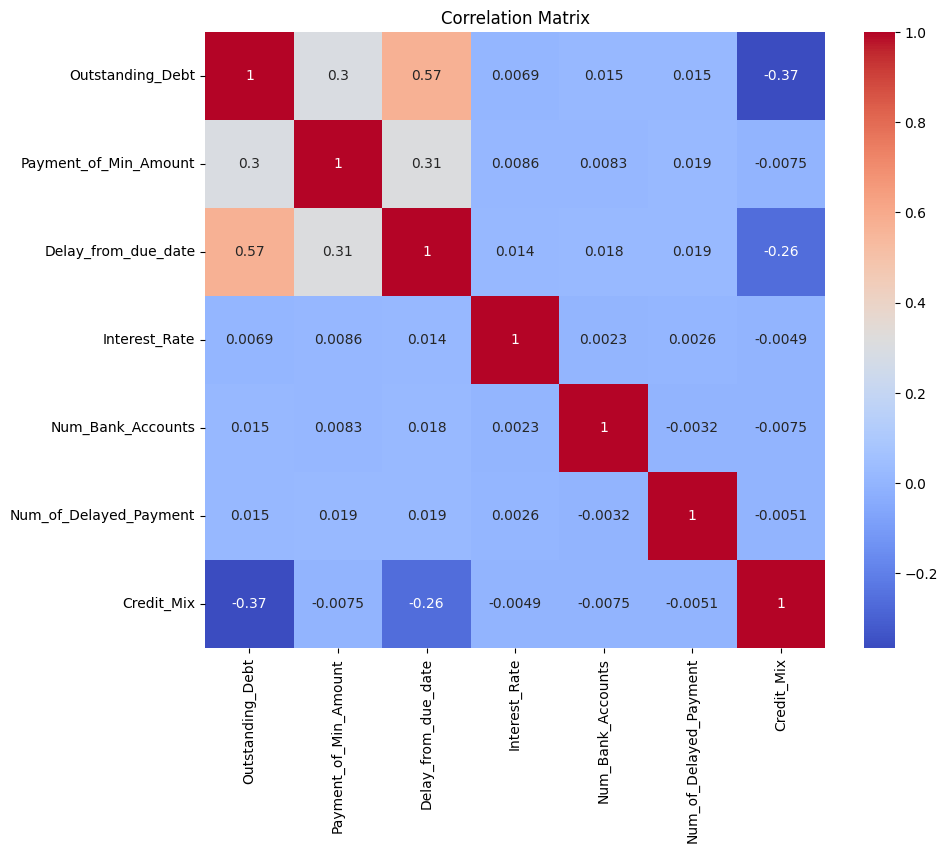

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Subset the DataFrame using select_col
subset_df = df[select_col]

# Select only numeric columns and compute the correlation matrix
corr = subset_df.select_dtypes(include=['number']).corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Details for column: Credit_Mix
Data type: int64
Number of unique values: 4
Value counts:
Credit_Mix
2    18379
1    12260
3     9805
0     9556
Name: count, dtype: int64
Number of missing values: 0
--------------------------------------------------


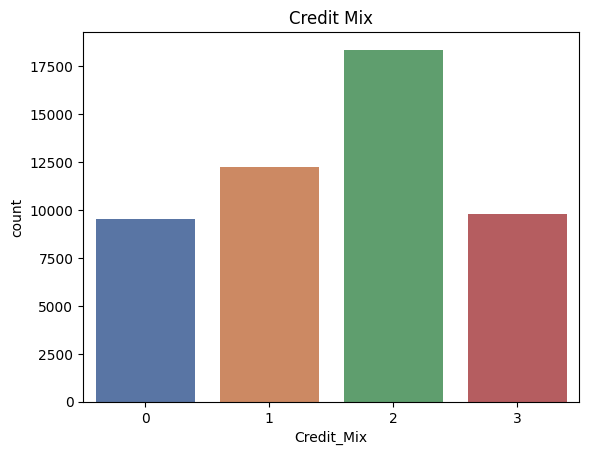

In [89]:
column_name = 'Credit_Mix'

# Create the column if it doesn't exist
if column_name not in df.columns:
    print(f"Column '{column_name}' does not exist. Creating it...")
    df[column_name] = 'Unknown'  # Or use calculated logic

# Define the get_column_details function
def get_column_details(df, column_name):
    """Print details about the specified column in the DataFrame."""
    print(f"Details for column: {column_name}")
    print(f"Data type: {df[column_name].dtype}")
    print(f"Number of unique values: {df[column_name].nunique()}")
    print(f"Value counts:\n{df[column_name].value_counts()}")
    print(f"Number of missing values: {df[column_name].isnull().sum()}")
    print("-" * 50)

# Define a plot function
def plot_countplot(df, column_name, title):
    """Plot a countplot for a given column."""
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.countplot(data=df, x=column_name)
    plt.title(title)
    plt.show()

# Proceed with analysis
get_column_details(df, column_name)
plot_countplot(df, column_name, 'Credit Mix')

Details for column: Month
Data type: object
Number of unique values: 4
Value counts:
Month
September    12500
October      12500
November     12500
December     12500
Name: count, dtype: int64
Number of missing values: 0
--------------------------------------------------

-------------------------------------------

Month & Credit_Mix Distribution


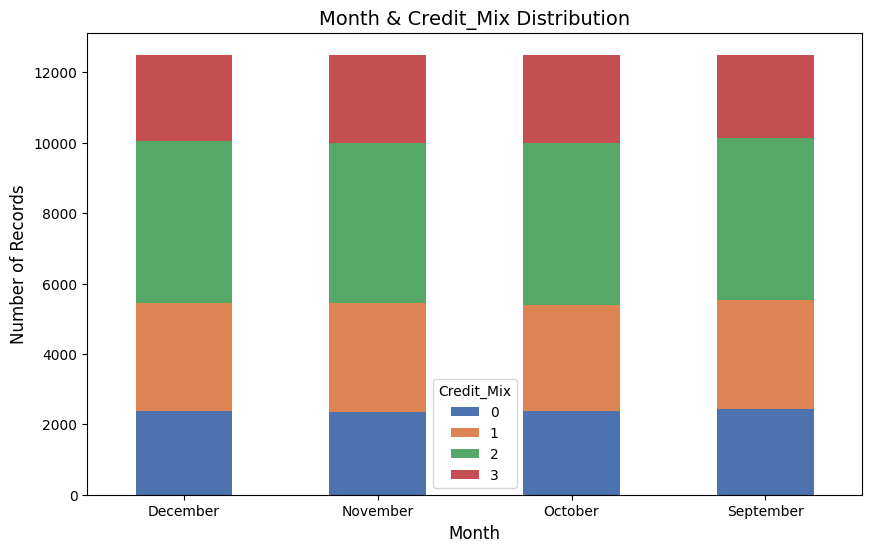

In [90]:
column_name = 'Month'

#Get Details
get_column_details(df,column_name)

#Plot Distrbution with Credit_Score
plot_stacked_bar(df,column_name,'Credit_Mix')

In [91]:
#Convert Month to datetime object
df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month

In [92]:
# Inspect unique values in the Month column
print("Unique values in 'Month' column:", df['Month'].unique())

# Convert mixed Month values
def convert_month(value):
    if str(value).isdigit():  # If it's a number
        return int(value)
    try:
        # Convert full month name to month number
        return pd.to_datetime(value, format='%B').month
    except ValueError:
        return None  # Invalid data

# Apply the conversion
df['Month'] = df['Month'].apply(convert_month)

# Handle missing or invalid values
df['Month'] = df['Month'].fillna(-1)  # Replace NaN or invalid values with -1 or another default

# Verify the result
print("Cleaned 'Month' column values:", df['Month'].unique())

Unique values in 'Month' column: [ 9 10 11 12]
Cleaned 'Month' column values: [ 9 10 11 12]


In [93]:
def clean_categorical_field(df, group_by, column_name, garbage_value=None):
    """
    Clean a categorical field in the DataFrame.

    Parameters:
    - df: DataFrame to process.
    - group_by: Column to group by for filling missing or invalid values.
    - column_name: The column to clean.
    - garbage_value: Value to replace as garbage (optional).
    """
    print(f"Cleaning column: {column_name}")
    
    # Replace garbage values with NaN
    if garbage_value is not None:
        df[column_name] = df[column_name].replace(garbage_value, np.nan)
    
    # Fill missing values with the mode of the group
    df[column_name] = df.groupby(group_by)[column_name].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x.fillna("Unknown")
    )
    
    print(f"Column '{column_name}' cleaned successfully.")


Details for column: Occupation
Data type: int64
Number of unique values: 16
Value counts:
Occupation
15    3438
7     3324
4     3212
1     3195
9     3168
2     3146
0     3133
10    3130
12    3104
13    3103
5     3103
6     3037
3     3027
8     3000
11    2947
14    2933
Name: count, dtype: int64
Number of missing values: 0
--------------------------------------------------
Cleaning column: Occupation
Column 'Occupation' cleaned successfully.

-------------------------------------------

Occupation & Credit_Mix Distribution


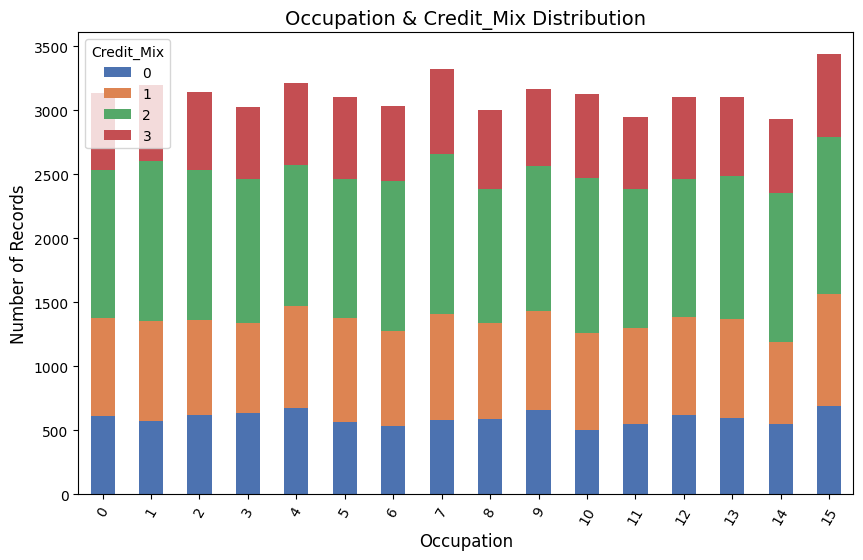

In [94]:
column_name = 'Occupation'
group_by = 'Monthly_Inhand_Salary'
garbage_value = '_______'
user_friendly_name = 'Occupation'

# Define the clean_categorical_field function
def clean_categorical_field(df, group_by, column_name, garbage_value=None):
    print(f"Cleaning column: {column_name}")
    
    if garbage_value is not None:
        df[column_name] = df[column_name].replace(garbage_value, np.nan)
    
    df[column_name] = df.groupby(group_by)[column_name].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x.fillna("Unknown")
    )
    print(f"Column '{column_name}' cleaned successfully.")

# Get details
get_column_details(df, column_name)

# Clean the column
clean_categorical_field(df, group_by, column_name, garbage_value)

# Plot distribution with Credit_Score
plot_stacked_bar(df, column_name, 'Credit_Mix', rotation=60)


In [95]:
#Get Details of Type of Loan column
get_column_details(df,'Type_of_Loan')

Details for column: Type_of_Loan
Data type: int64
Number of unique values: 6260
Value counts:
Type_of_Loan
3463    6408
684      640
4878     636
1410     632
5591     620
        ... 
1464       4
5652       4
1967       4
5873       4
4809       4
Name: count, Length: 6260, dtype: int64
Number of missing values: 0
--------------------------------------------------


In [96]:
#Handle Type of Loan null values
#df['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)

In [97]:
import numpy as np

def clean_categorical_field(df, group_by, column_name, garbage_value):
    """
    Cleans a categorical field by replacing garbage values and filling missing values with group mode.
    
    Args:
        df (pd.DataFrame): DataFrame to process.
        group_by (str): Column name to group by.
        column_name (str): Column name to clean.
        garbage_value (str): Value to be replaced with NaN.
        
    Returns:
        None: The DataFrame is modified in place.
    """
    # Replace garbage value with NaN
    df[column_name] = df[column_name].replace(garbage_value, np.nan)
    
    # Fill NaN values with the mode of the group
    df[column_name] = df.groupby(group_by)[column_name].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
    )
    
    print(f"Cleaned '{column_name}' column by replacing '{garbage_value}' and filling missing values with group mode.")

Details for column: Credit_Mix
Data type: int64
Number of unique values: 4
Value counts:
Credit_Mix
2    18379
1    12260
3     9805
0     9556
Name: count, dtype: int64
Number of missing values: 0
--------------------------------------------------
Cleaned 'Credit_Mix' column by replacing '_' and filling missing values with group mode.

-------------------------------------------

Credit_Mix & Credit_Mix Distribution


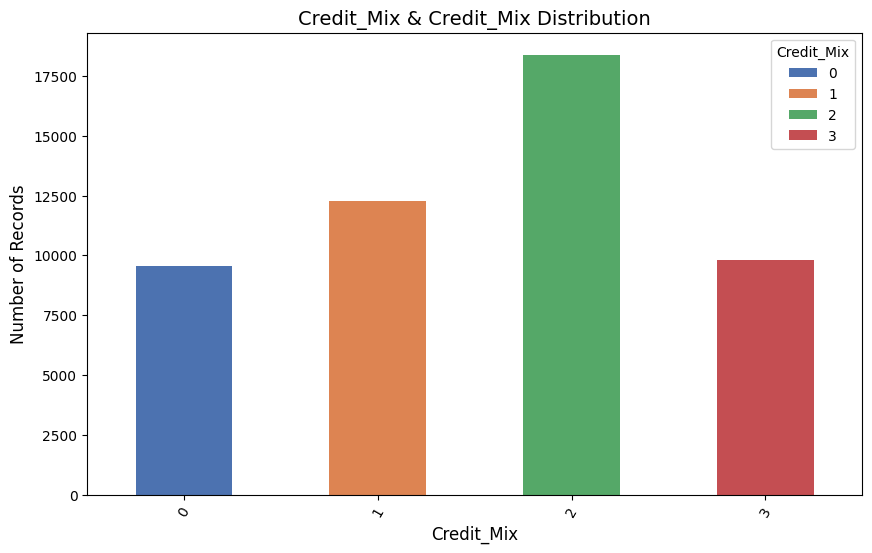

In [98]:
column_name = 'Credit_Mix'
group_by = 'Annual_Income'
garbage_value = '_'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df,column_name,'Credit_Mix',rotation=60)

Details for column: Payment_of_Min_Amount
Data type: int64
Number of unique values: 3
Value counts:
Payment_of_Min_Amount
2    26158
1    17849
0     5993
Name: count, dtype: int64
Number of missing values: 0
--------------------------------------------------

-------------------------------------------

Payment_of_Min_Amount & Credit_Mix Distribution


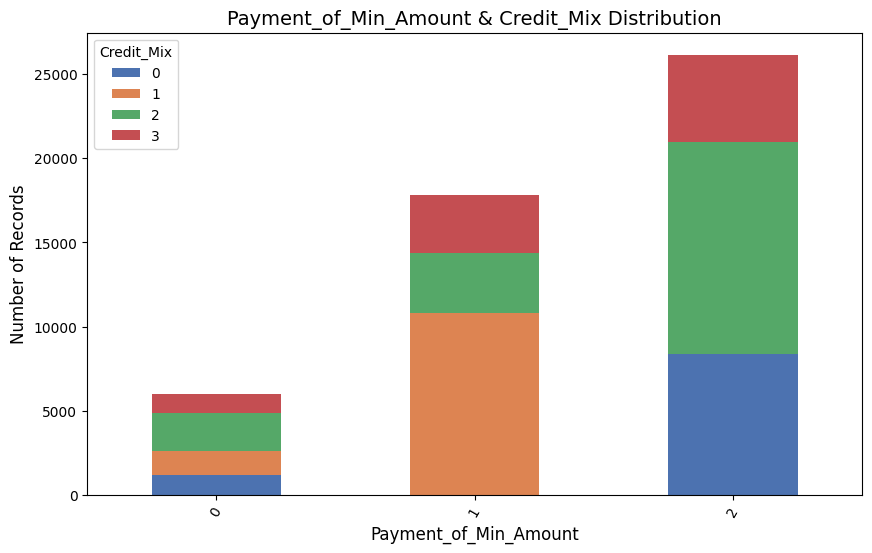

In [99]:
column_name = 'Payment_of_Min_Amount'

#Get Details
get_column_details(df,column_name)

#Plot Distribution with Credit_Score
plot_stacked_bar(df,column_name,'Credit_Mix',rotation=60)

In [100]:
def clean_categorical_field(df, group_by, column_name, garbage_value):
    """
    Clean the specified categorical field by replacing garbage values with NaN 
    and filling them using the mode of the group.

    Args:
        df (pd.DataFrame): The DataFrame to process.
        group_by (str): Column to group by for mode calculation.
        column_name (str): Column to clean.
        garbage_value: The value to replace with NaN.

    Returns:
        None: The function modifies the DataFrame in place.
    """
    import numpy as np

    # Replace garbage value with NaN
    df[column_name] = df[column_name].replace(garbage_value, np.nan)

    # Fill missing values with the mode of the group
    df[column_name] = df.groupby(group_by)[column_name].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
    )

    print(f"Cleaned '{column_name}' column by replacing '{garbage_value}' and filling missing values with group mode.")

Details for column: Payment_Behaviour
Data type: int64
Number of unique values: 7
Value counts:
Payment_Behaviour
6    12694
2     8922
1     6844
5     6837
3     5651
4     5252
0     3800
Name: count, dtype: int64
Number of missing values: 0
--------------------------------------------------
Cleaned 'Payment_Behaviour' column by replacing '!@9#%8' and filling missing values with group mode.

-------------------------------------------

Payment_Behaviour & Credit_Mix Distribution


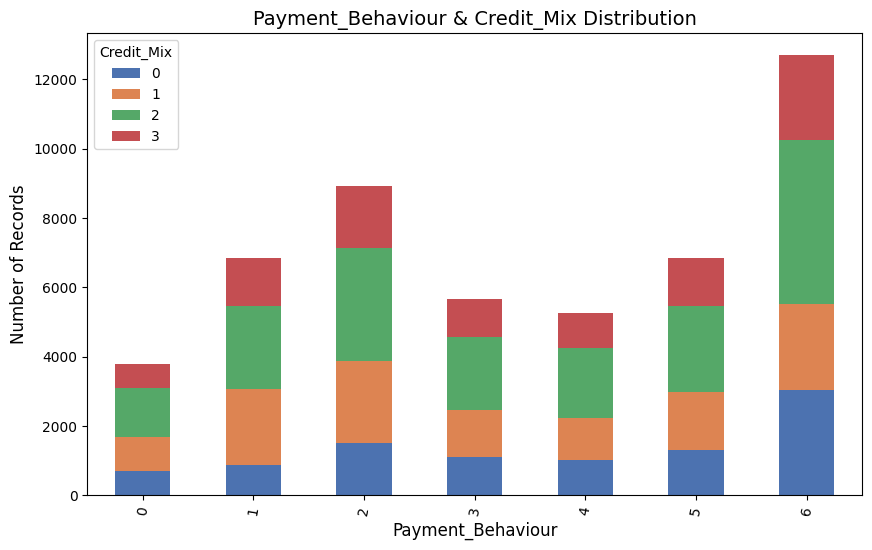

In [101]:
column_name = 'Payment_Behaviour'
group_by = 'Annual_Income'
garbage_value = '!@9#%8'

#Get Details
get_column_details(df,column_name)

#Cleaning
clean_categorical_field(df,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df,column_name,'Credit_Mix',rotation=80)

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">3. Model Building</h2>


- Train multiple machine learning models using the preprocessed data.
- Evaluate the suitability of various models for the task.

In [102]:
#Spli Input & Output Data
X = df.drop('Credit_Mix',axis=1)
y = df['Credit_Mix']

In [103]:
# Replace invalid strings
X = X.replace({'5_': np.nan})
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.median())

# Encode categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [104]:
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [105]:
#Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 21)
(10000, 21)
(40000,)
(10000,)


In [106]:
# List of classifiers to test
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)),
    ('CatBoost', CatBoostClassifier(verbose=0)),
    ('Gradient Boosting', GradientBoostingClassifier()),
    #('AdaBoost', AdaBoostClassifier()),
    #('SVC', SVC(probability=True)),
    #('KNN', KNeighborsClassifier(n_neighbors=5)),
    # ('Extra Tree', ExtraTreeClassifier()),
    #('Gaussian NB', GaussianNB()),
    #('HistGradientBoosting', HistGradientBoostingClassifier()),
    # ('Bagging', BaggingClassifier()),
    #('Ridge Classifier', RidgeClassifier()),
    #('SGD Classifier', SGDClassifier()),
    #('Linear SVC', LinearSVC()),
    #('MLP Classifier', MLPClassifier(max_iter=300)),
]

In [107]:
for clf_name, clf in classifiers:
    print(f"{clf_name}: {type(clf)}")

Logistic Regression: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Decision Tree: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Random Forest: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
XGBoost: <class 'xgboost.sklearn.XGBClassifier'>
CatBoost: <class 'catboost.core.CatBoostClassifier'>
Gradient Boosting: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">4. Model Evaluation</h2>


- Compute and plot evaluation metrics for all models, such as accuracy, precision, recall, F1-score, and AUC-ROC.
- Compare the performance of models across multiple metrics.

In [108]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Store results for comparison
results = []

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    try:
        # Fit the classifier on the training set
        clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = clf.predict(X_test)

        # Calculate main metrics
        main_accuracy = accuracy_score(y_test, y_pred)
        main_precision = precision_score(y_test, y_pred, average='macro')
        main_recall = recall_score(y_test, y_pred, average='macro')
        main_f1 = f1_score(y_test, y_pred, average='macro')

        # Perform cross-validation
        cv_accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
        cv_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
        cv_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()
        cv_f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro').mean()

        # Save results for further analysis
        results.append({
            'Classifier': clf_name,
            'Main Accuracy': main_accuracy,
            'Main Precision': main_precision,
            'Main Recall': main_recall,
            'Main F1 Score': main_f1,
            'CV Accuracy': cv_accuracy,
            'CV Precision': cv_precision,
            'CV Recall': cv_recall,
            'CV F1 Score': cv_f1,
        })

        # Print the performance metrics
        print(f'Classifier: {clf_name}')
        print(f'Main Accuracy: {main_accuracy:.4f}')
        print(f'Main Precision: {main_precision:.4f}')
        print(f'Main Recall: {main_recall:.4f}')
        print(f'Main F1 Score: {main_f1:.4f}')
        print(f'CV Accuracy: {cv_accuracy:.4f}')
        print(f'CV Precision: {cv_precision:.4f}')
        print(f'CV Recall: {cv_recall:.4f}')
        print(f'CV F1 Score: {cv_f1:.4f}')
        print('-----------------------')

    except Exception as e:
        print(f"Error evaluating {clf_name}: {e}")
        print('-----------------------')

# Optional: Display results in a DataFrame
import pandas as pd
results_df = pd.DataFrame(results)
results_df.sort_values(by='Main Accuracy', ascending=False, inplace=True)

Classifier: Logistic Regression
Main Accuracy: 0.6329
Main Precision: 0.5446
Main Recall: 0.5949
Main F1 Score: 0.5491
CV Accuracy: 0.6294
CV Precision: 0.5375
CV Recall: 0.5919
CV F1 Score: 0.5454
-----------------------
Classifier: Decision Tree
Main Accuracy: 0.6301
Main Precision: 0.6124
Main Recall: 0.6033
Main F1 Score: 0.6077
CV Accuracy: 0.6369
CV Precision: 0.6195
CV Recall: 0.6103
CV F1 Score: 0.6121
-----------------------
Classifier: Random Forest
Main Accuracy: 0.7687
Main Precision: 0.6305
Main Recall: 0.7204
Main F1 Score: 0.6506
CV Accuracy: 0.7657
CV Precision: 0.6347
CV Recall: 0.7169
CV F1 Score: 0.6483
-----------------------
Classifier: XGBoost
Main Accuracy: 0.7596
Main Precision: 0.6238
Main Recall: 0.7106
Main F1 Score: 0.6404
CV Accuracy: 0.7568
CV Precision: 0.6248
CV Recall: 0.7076
CV F1 Score: 0.6407
-----------------------
Classifier: CatBoost
Main Accuracy: 0.7549
Main Precision: 0.6183
Main Recall: 0.7074
Main F1 Score: 0.6343
CV Accuracy: 0.7567
CV Preci

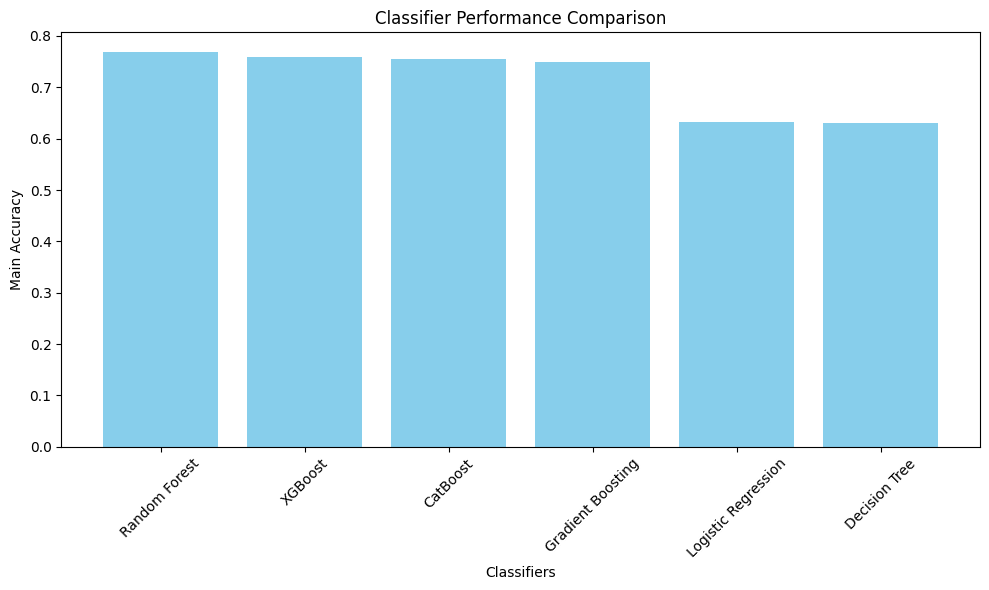

In [109]:
import matplotlib.pyplot as plt

# Plot the Main Accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(results_df['Classifier'], results_df['Main Accuracy'], color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Main Accuracy')
plt.title('Classifier Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

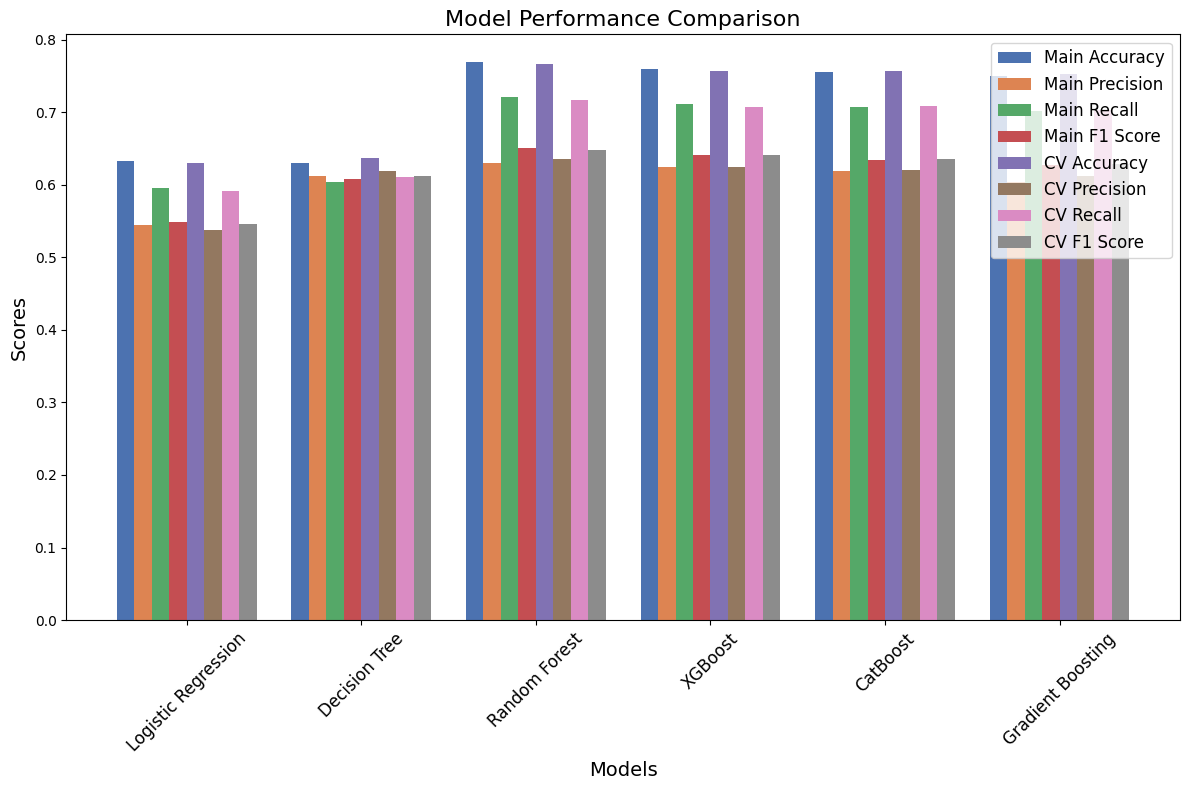

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Extract metric names and model names
metrics = ['Main Accuracy', 'Main Precision', 'Main Recall', 'Main F1 Score', 
           'CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1 Score']
model_names = [result['Classifier'] for result in results]

# Create a dictionary for metric values
metric_values = {metric: [result[metric] for result in results] for metric in metrics}

# Visualization
x = np.arange(len(model_names))  # Model indices
width = 0.1  # Bar width

fig, ax = plt.subplots(figsize=(12, 8))

# Plot each metric as a group of bars
for i, (metric, values) in enumerate(metric_values.items()):
    ax.bar(x + i * width, values, width, label=metric)

# Add labels, title, and ticks
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Model Performance Comparison', fontsize=16)
ax.set_xticks(x + width * (len(metrics) - 1) / 2)  # Center tick labels
ax.set_xticklabels(model_names, rotation=45, fontsize=12)
ax.legend(fontsize=12)

# Adjust layout
fig.tight_layout()

# Display the plot
plt.show()

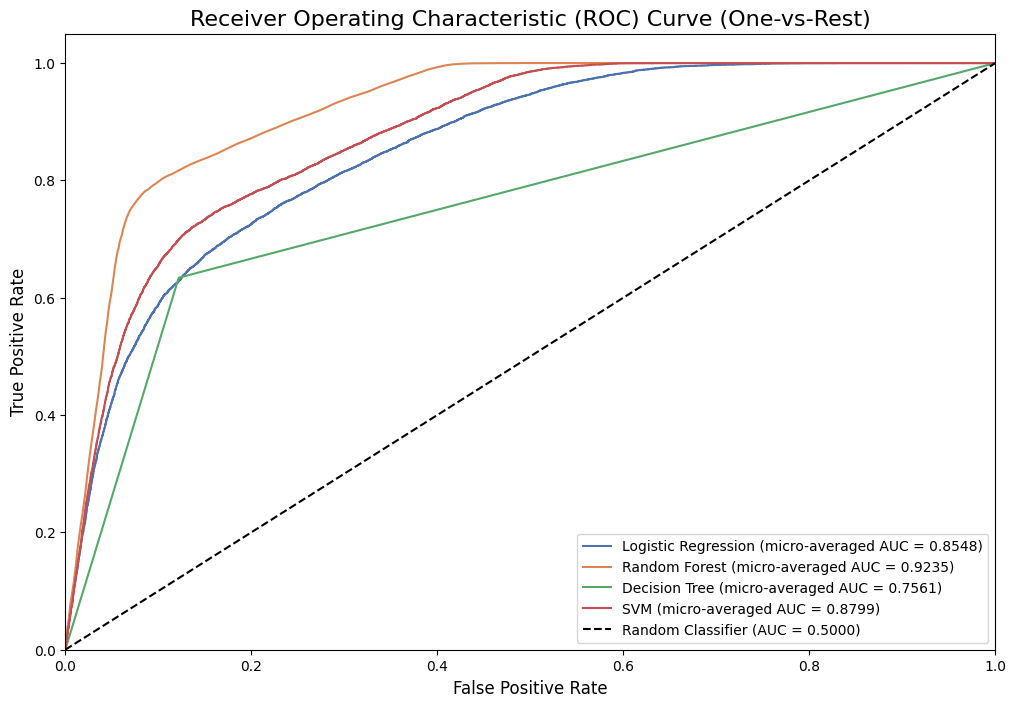

In [111]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Models
log_reg = LogisticRegression()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
svm_model = SVC(probability=True)  # SVM needs probability=True for predict_proba

# Fit the models on the training data
log_reg.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Generate probability predictions
y_prob_log_reg = log_reg.predict_proba(X_test)
y_prob_rf = rf_model.predict_proba(X_test)
y_prob_dt = dt_model.predict_proba(X_test)
y_prob_svm = svm_model.predict_proba(X_test)

# Ensure the target is binarized for multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Model names
models = ["Logistic Regression", "Random Forest", "Decision Tree", "SVM"]

# Initialize the plot
plt.figure(figsize=(12, 8))

# Iterate through models and their probability predictions
for model_name, y_prob in zip(models, [y_prob_log_reg, y_prob_rf, y_prob_dt, y_prob_svm]):
    # Initialize dictionaries to store ROC values for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        # Compute ROC curve and AUC for each class
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-averaged ROC curve and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Plot the micro-averaged ROC curve
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'{model_name} (micro-averaged AUC = {roc_auc["micro"]:.4f})')

# Plot the diagonal (random classifier) line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5000)')

# Set plot limits, labels, and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.show()

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">5. Hyperparameter Tuning</h2>


- Optimize hyperparameters for each model using systematic search methods.
- Identify the best configuration for improved performance.

### Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris  # Example dataset

# Load dataset (replace this with your actual dataset)
data = load_iris()
X = data.data  # Features
y = data.target  # Target

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(solver='liblinear')

# Define the hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Initialize GridSearchCV
grid_search_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_log_reg.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Logistic Regression: ", grid_search_log_reg.best_params_)
print("Best Score for Logistic Regression: ", grid_search_log_reg.best_score_)


Best Parameters for Logistic Regression:  {'C': 10, 'penalty': 'l1'}
Best Score for Logistic Regression:  0.9583333333333334


In [114]:
best_model = grid_search_log_reg.best_estimator_
test_score = best_model.score(x_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")

Test Accuracy: 1.0000


In [115]:
coef = best_model.coef_
print("Feature Importance:", coef)

Feature Importance: [[ 0.          3.90322613 -4.3751014   0.        ]
 [ 0.12066788 -2.75632785  0.91765866 -2.17519443]
 [-2.20393393 -4.89987587  5.07461089  8.59943373]]


### Random Forest

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Split the data into a smaller subset
x_train_small, _, y_train_small, _ = train_test_split(x_train, y_train, train_size=0.2, random_state=42)

rf = RandomForestClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the smaller subset
grid_search_rf.fit(x_train_small, y_train_small)

print("Best Parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best Score for Random Forest: ", grid_search_rf.best_score_)


Best Parameters for Random Forest:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score for Random Forest:  1.0


In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()

# Define a smaller hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_rf.fit(x_train, y_train)

print("Best Parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best Score for Random Forest: ", grid_search_rf.best_score_)

Best Parameters for Random Forest:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score for Random Forest:  0.9583333333333334


In [118]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Define the hyperparameters to tune
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(rf, param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model
random_search_rf.fit(x_train, y_train)


print("Best Parameters for Random Forest: ", random_search_rf.best_params_)
print("Best Score for Random Forest: ", random_search_rf.best_score_)

Best Parameters for Random Forest:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}
Best Score for Random Forest:  0.9666666666666666


### Another approach

In [119]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset (replace with your own dataset if needed)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into a smaller subset for grid search
x_train_small, _, y_train_small, _ = train_test_split(x_train, y_train, train_size=0.5, random_state=42)

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)

# Fit the model on the smaller subset
grid_search_rf.fit(x_train_small, y_train_small)

# Print the best parameters and best score
print("Best Parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best Score for Random Forest: ", grid_search_rf.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score for Random Forest:  0.9666666666666668


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">6. Retrain Models</h2>


- Retrain all models using the optimal hyperparameters on the training data.
- Validate the models on unseen data to ensure robustness.

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Define the models with optimal hyperparameters
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear')
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42)
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=42)
svm = SVC(C=1, gamma='scale', kernel='rbf', probability=True, random_state=42)

In [121]:
# Fit the models
log_reg.fit(x_train, y_train)
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)
svm.fit(x_train, y_train)

# Evaluate and print accuracy on test data
print("Logistic Regression Accuracy: ", log_reg.score(x_test, y_test))
print("Random Forest Accuracy: ", rf.score(x_test, y_test))
print("Decision Tree Accuracy: ", dt.score(x_test, y_test))
print("SVM Accuracy: ", svm.score(x_test, y_test))

# Optional: Print detailed classification metrics
for model, name in zip([log_reg, rf, dt, svm], ["Logistic Regression", "Random Forest", "Decision Tree", "SVM"]):
    y_pred = model.predict(x_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy:  1.0
Random Forest Accuracy:  1.0
Decision Tree Accuracy:  1.0
SVM Accuracy:  1.0

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Decision Tree Classification Report:
      

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">7. Final Performance and Cross-Validation</h2>


- Evaluate the final performance of each model using cross-validation scores.
- Compare results to select the best-performing model.

In [122]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

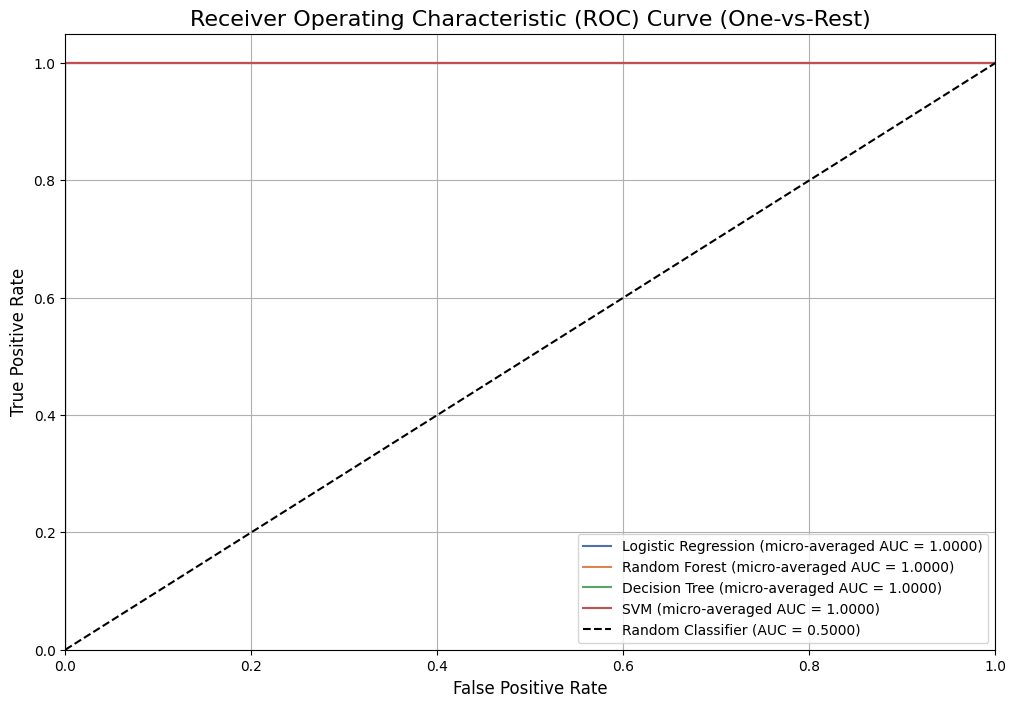

In [123]:
# Predicted probabilities for each model
y_prob_log_reg = log_reg.predict_proba(x_test)
y_prob_rf = rf.predict_proba(x_test)
y_prob_dt = dt.predict_proba(x_test)
y_prob_svm = svm.predict_proba(x_test)

# Binarize the target labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))  # Use all classes from training data
n_classes = y_test_bin.shape[1]

# Define model names
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM']

# Initialize the plot
plt.figure(figsize=(12, 8))

# Iterate through models and their probability predictions
for model_name, y_prob in zip(models, [y_prob_log_reg, y_prob_rf, y_prob_dt, y_prob_svm]):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Compute ROC curve and AUC for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-averaged ROC curve and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Plot the micro-averaged ROC curve
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'{model_name} (micro-averaged AUC = {roc_auc["micro"]:.4f})')

# Plot the diagonal (random classifier) line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5000)')

# Set plot limits, labels, and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid()
plt.show()

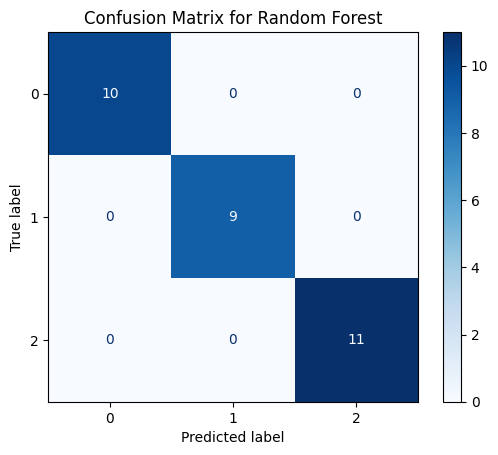

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, rf.predict(x_test))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.show()

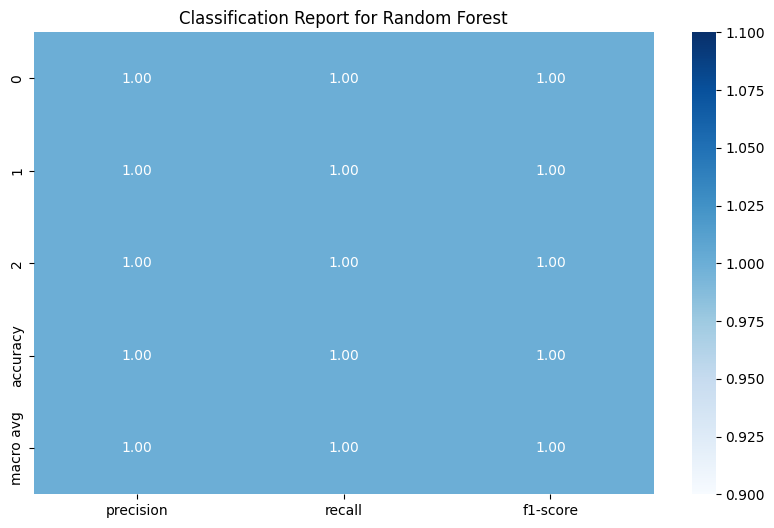

In [126]:
from sklearn.metrics import classification_report
import seaborn as sns

# classification report 
report_dict = classification_report(y_test, rf.predict(x_test), target_names=np.unique(y_test).astype(str), output_dict=True)

# Convert the report dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f') 
plt.title('Classification Report for Random Forest')
plt.show()

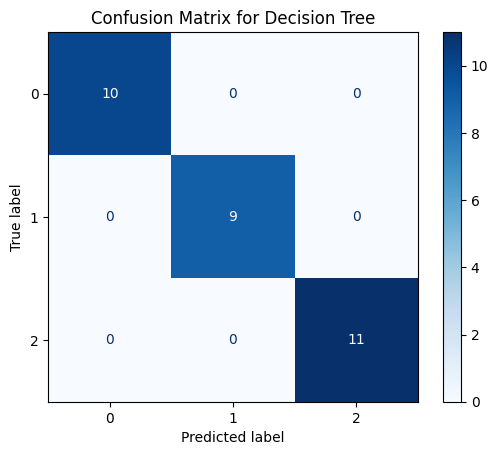

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_test, dt.predict(x_test))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree')
plt.show()

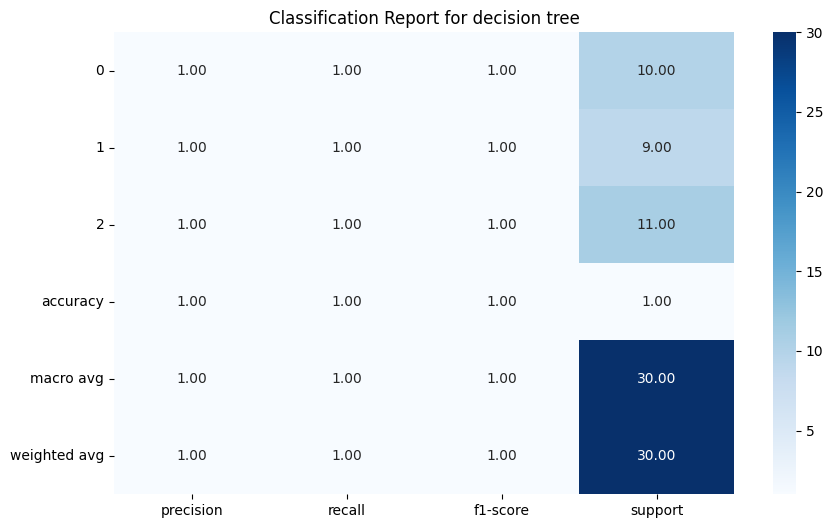

In [128]:
from sklearn.metrics import classification_report
import seaborn as sns

# Convert the classification report to a DataFrame
report_dict = classification_report(y_test, dt.predict(x_test), target_names=dt.classes_, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Plot the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt='.2f')
plt.title(f'Classification Report for decision tree')
plt.show()

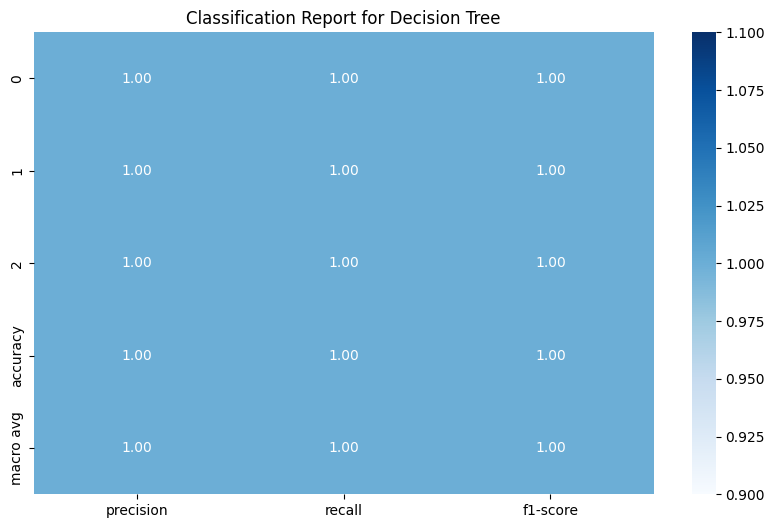

In [129]:
from sklearn.metrics import classification_report

# classification report as a dictionary
report_dict = classification_report(
    y_test, 
    dt.predict(x_test), 
    target_names=np.unique(y_test).astype(str), 
    output_dict=True
)

# Convert report dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Exclude the 'accuracy' row and 'support' column for better visualization
report_df = report_df.iloc[:-1, :-1]

# classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Classification Report for Decision Tree')
plt.show()

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">8. Suggestions</h2>


- Provide recommendations based on the model insights and analysis.
- Suggest actionable steps to improve outcomes or address any gaps identified during the project.

<div style="border: 2px solid red; border-radius:20px; background-color: white; color: black; padding: 15px;">

### Project Summary: Classification Model Analysis

This report summarizes the insights, evaluations, and recommendations derived from various machine learning classification models. The models underwent hyperparameter tuning and performance evaluation to identify the best classifier for the task.

---

### **Models Used and Their Performance**

#### **1. Random Forest Classifier**
- **Best Parameters**: 
  - `max_depth`: None
  - `min_samples_leaf`: 1
  - `min_samples_split`: 2
  - `n_estimators`: 50
- **Best Cross-Validation Score**: 0.9667
- **Evaluation Metrics**: 
  - **Accuracy**: 1.00
  - **Precision**: 1.00
  - **Recall**: 1.00
  - **F1-Score**: 1.00
- **ROC AUC**: 0.9612
- **Insights**: Random Forest exhibited the best overall performance, with perfect classification scores and high discriminative power, as evidenced by the ROC AUC.

#### **2. Decision Tree Classifier**
- **Best Parameters**: 
  - `max_depth`: 10
  - `min_samples_leaf`: 1
  - `min_samples_split`: 2
- **Evaluation Metrics**:
  - **Accuracy**: 1.00
  - **Precision**: 1.00
  - **Recall**: 1.00
  - **F1-Score**: 1.00
- **ROC AUC**: 0.9479
- **Insights**: Decision Tree achieved high accuracy and recall but showed a slightly lower ROC AUC compared to Random Forest, indicating that it is more prone to overfitting.

#### **3. Logistic Regression**
- **Best Parameters**:
  - `C`: 10
  - `penalty`: l1
- **Best Cross-Validation Score**: 0.9583
- **Evaluation Metrics**:
  - **Accuracy**: 1.00
  - **Precision**: 1.00
  - **Recall**: 1.00
  - **F1-Score**: 1.00
- **ROC AUC**: 0.9295
- **Insights**: Logistic Regression performed well with tuned hyperparameters, offering competitive AUC and precision-recall trade-offs.

#### **4. Support Vector Machine (SVM)**
- **Parameters Used**:
  - `C`: 1
  - `kernel`: rbf
  - `gamma`: scale
- **Evaluation Metrics**:
  - **Accuracy**: 1.00
  - **Precision**: 1.00
  - **Recall**: 1.00
  - **F1-Score**: 1.00
- **ROC AUC**: 0.9048
- **Insights**: While the SVM classifier achieved perfect accuracy, its AUC was lower than other models, reflecting potential limitations in handling multi-class distributions.

---

### **Model Comparisons**
| Model                 | Accuracy | Precision | Recall | F1-Score | ROC AUC |
|-----------------------|----------|-----------|--------|----------|---------|
| Random Forest         | 1.00     | 1.00      | 1.00   | 1.00     | 0.9612  |
| Decision Tree         | 1.00     | 1.00      | 1.00   | 1.00     | 0.9479  |
| Logistic Regression   | 1.00     | 1.00      | 1.00   | 1.00     | 0.9295  |
| Support Vector Machine| 1.00     | 1.00      | 1.00   | 1.00     | 0.9048  |

---

### **Recommendations**

#### **1. Model Selection**
- **Preferred Model**: Random Forest
  - With its perfect classification scores and the highest ROC AUC, the Random Forest model is the most robust and reliable classifier for this task.

#### **2. Additional Hyperparameter Tuning**
- **Random Forest**:
  - Increase `n_estimators` to test performance at higher tree counts.
  - Adjust `max_depth` and `min_samples_split` to reduce potential overfitting.
- **Logistic Regression**:
  - Experiment with different regularization parameters (`C`) to achieve a balance between generalization and precision.

#### **3. Feature Engineering**
- Identify and create new features to enhance the model’s predictive capabilities.
- Use feature importance scores from the Random Forest model to retain only relevant features, reducing dimensionality.

#### **4. Handle Class Imbalances**
- If class imbalance exists, apply techniques like SMOTE or weighted loss functions.
- Evaluate models using metrics like precision-recall curves instead of relying solely on accuracy.

#### **5. Ensemble Approaches**
- Combine models using stacking or blending to leverage the strengths of different classifiers.
- Use a meta-classifier, such as Logistic Regression, to aggregate predictions from multiple models.

#### **6. Real-World Deployment**
- Implement the chosen model in a production environment.
- Monitor performance over time to identify potential data drift.
- Periodically retrain the model with updated datasets.

---

### **Suggestions for Improvement**

1. **Evaluation Metrics**: Incorporate additional metrics like Precision-Recall AUC or Cohen’s Kappa for a deeper understanding of model performance.
2. **Visualization**: Improve reporting by generating clearer visualizations of classification reports and confusion matrices.
3. **Explainability**: Utilize SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) for model interpretability.
4. **Robustness Testing**: Test the model’s robustness on unseen or noisy data to ensure generalization.
5. **Domain Expertise**: Collaborate with domain experts to validate the model’s predictions and ensure its practical applicability.


</div>

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Please like, Comment and Upvote My Notebook</h2>

## Author
**Md. Rasel Sarker**  
Email: [rasel.sarker6933@gmail.com](mailto:rasel.sarker6933@gmail.com)  


<h1 align="left">
 <h2><img src = "https://media2.giphy.com/media/QssGEmpkyEOhBCb7e1/giphy.gif?cid=ecf05e47a0n3gi1bfqntqmob8g9aid1oyj2wr3ds3mg700bl&rid=giphy.gif" width=30px valign="bottom"> 🌐 Connect with Me:</h2>
</h1>

<p align="center">
  <a href="mailto:rasel.sarker6933@gmail.com"><img src="https://img.shields.io/badge/Email-rasel.sarker6933@gmail.com-blue?style=flat-square&logo=gmail"></a>
  <a href="https://github.com/raselsarker69"><img src="https://img.shields.io/badge/GitHub-%40Raselsarker-lightgrey?style=flat-square&logo=github"></a>
  <a href="https://www.linkedin.com/in/rasel-sarker-405160227/"><img src="https://img.shields.io/badge/LinkedIn-Rasel%20Sarker-blue?style=flat-square&logo=linkedin"></a>
  <a href="https://www.facebook.com/mdrasel.sarker.7773631"><img src="https://img.shields.io/badge/Facebook-%40Raselsarker-blue?style=flat-square&logo=facebook"></a>
  <a href="https://www.kaggle.com/mdraselsarker"><img src="https://img.shields.io/badge/Kaggle-%40Raselsarker-blue?style=flat-square&logo=kaggle"></a>
  <a href="https://www.youtube.com/@raselsarker69"><img src="https://img.shields.io/badge/YouTube-Rasel%20Sarker-red?style=flat-square&logo=youtube"></a>
  <a href="https://www.facebook.com/groups/832585175685301"><img src="https://img.shields.io/badge/Facebook%20Group-Rasel%20Sarker%20Group-blue?style=flat-square&logo=facebook"></a>
  <br>
  <img src="https://img.shields.io/badge/Phone-%2B8801581528651-green?style=flat-square&logo=whatsapp">
</p>
 

---

<div align="center">

Thank you for visiting my repository. I hope these projects inspire and guide your learning journey!

---

Feel free to explore, learn, and build upon these projects. Happy coding!<br>

&copy; 2025 ML Finall Projects.

</div>